In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Setting seaborn default theme
sns.set()

In [5]:
#Reading data
ts = pd.read_csv('/content/Gold_Yearly .csv')

#Viewing first 5 rows 
ts.head()

,Year,Average\nClosing Price,Year Open,Year High,Year Low,Year Close,Annual\n% Change
0,1969,41.10,41.80,43.75,35.00,35.21,-0.1607
1,1970,35.96,35.13,39.19,34.78,37.38,0.0616
2,1971,40.80,37.33,43.90,37.33,43.50,0.1637
3,1972,58.17,43.73,70.00,43.73,64.70,0.4874
4,1973,97.12,64.99,127.00,64.10,112.25,0.7349


In [6]:
#Renaming columns
ts = ts.rename(columns={'Average\nClosing Price': 'Avg Closing Price',
                       'Annual\n% Change':'Annual Percentage Change'})

#Setting index to year
ts = ts.set_index('Year')

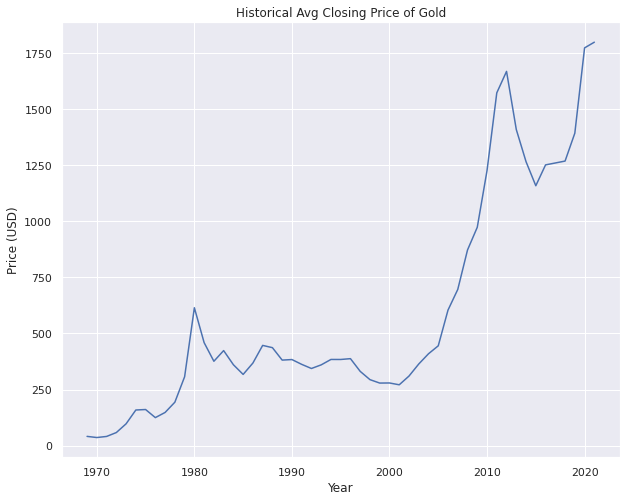

In [7]:
#Create a figure and one subplot 
fig, ax = plt.subplots(figsize=(10,8))

#Plotting
ax.plot(ts.index, ts['Avg Closing Price'])


#Modifying Labels
ax.set_title('Historical Avg Closing Price of Gold')
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')

#Displaying figure
plt.show()

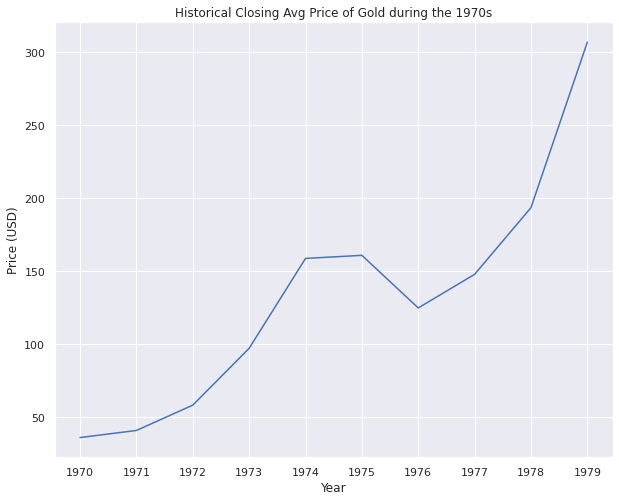

In [8]:
# Create a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,8))

#List with x-tick values
x = [1970,1971,1972,1973,1974,1975,1976,1977,1978,1979]

#Subsetting data
seventies = ts.loc[1970:1979]

#Plotting
ax.plot(seventies.index, seventies['Avg Closing Price'])

#Modifying Labels
plt.xticks(x)
plt.title('Historical Closing Avg Price of Gold during the 1970''s')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

#Displaying figure
plt.show()

Use NumPy's polyfit to fit a polynomial function

In [10]:
from numpy import polyfit
import numpy as np
def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)
def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)
def get_trend(s, degree=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

Plot seasonality and trend on top of Average Closing Price

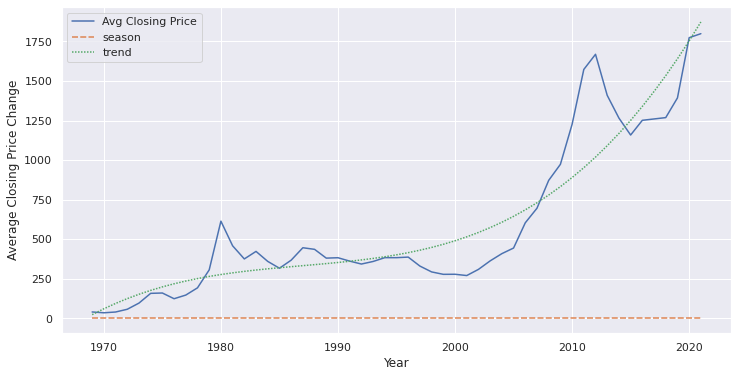

In [12]:
import seaborn as sns
plt.figure(figsize=(12, 6))
ts['trend'] = get_trend(ts['Avg Closing Price'])
ts['season'] = get_season(ts['Avg Closing Price'] - ts['trend'])
sns.lineplot(data=ts[['Avg Closing Price', 'season', 'trend']])
plt.ylabel('Average Closing Price Change');

Autocorrelation Plot

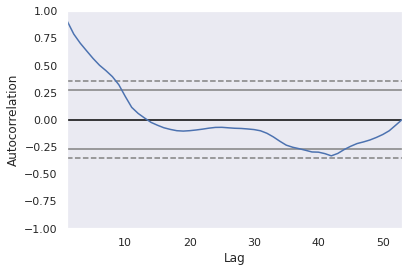

In [14]:
pd.plotting.autocorrelation_plot(ts['Avg Closing Price'])

Test stationarity of the model

In [15]:
from statsmodels.tsa import stattools
stattools.adfuller(ts['Avg Closing Price'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(-0.25863925675492744,
 0.9311614073211184,
 1,
 51,
 {'1%': -3.5656240522121956,
  '10%': -2.598014675124952,
  '5%': -2.920142229157715},
 508.31060814763543)

With a p-value of 0.93, we cannot assume that the data are stationary

Frequency Domain Analysis

In [16]:
!pip install quantecon

     |████████████████████████████████| 269 kB 5.1 MB/s 


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import ARMA, periodogram, ar_periodogram

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


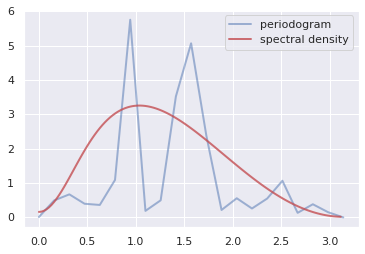

In [18]:
n = 40                          # Data size
ϕ, θ = 0.5, (0, -0.8)           # AR and MA parameters
lp = ARMA(ϕ, θ)
X = lp.simulation(ts_length=n)

fig, ax = plt.subplots()
x, y = periodogram(X)
ax.plot(x, y, 'b-', lw=2, alpha=0.5, label='periodogram')
x_sd, y_sd = lp.spectral_density(two_pi=False, res=120)
ax.plot(x_sd, y_sd, 'r-', lw=2, alpha=0.8, label='spectral density')
ax.legend()
plt.show()

Computers cannot do computations with an infinite number of data points. Therefore, all signals are "cut off" at either end. This causes the ripple on either side of the peak illustrated below. The Hamming window reduces this ripple, providing a more accurate idea of the original signal's frequency spectrum

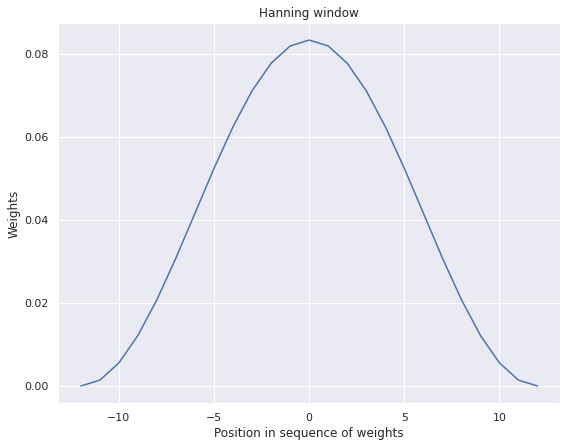

In [19]:
def hanning_window(M):
    w = [0.5 - 0.5 * np.cos(2 * np.pi * n/(M-1)) for n in range(M)]
    return w

window = hanning_window(25) / np.abs(sum(hanning_window(25)))
x = np.linspace(-12, 12, 25)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(x, window)
ax.set_title("Hanning window")
ax.set_ylabel("Weights")
ax.set_xlabel("Position in sequence of weights")
plt.show()